In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim
from torch.autograd import Variable

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train_data = datasets.MNIST (
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST (
    root = 'data',
    train = False,
    transform = ToTensor(),
)

100%|██████████| 9912422/9912422 [00:00<00:00, 379558608.00it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 35306235.45it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 113485033.01it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19539003.86it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
print(train_data.size())

In [ ]:
print(test_data.size())

<function matplotlib.pyplot.show(close=None, block=None)>

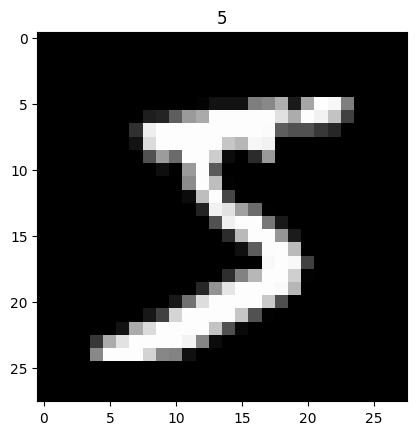

In [ ]:
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show

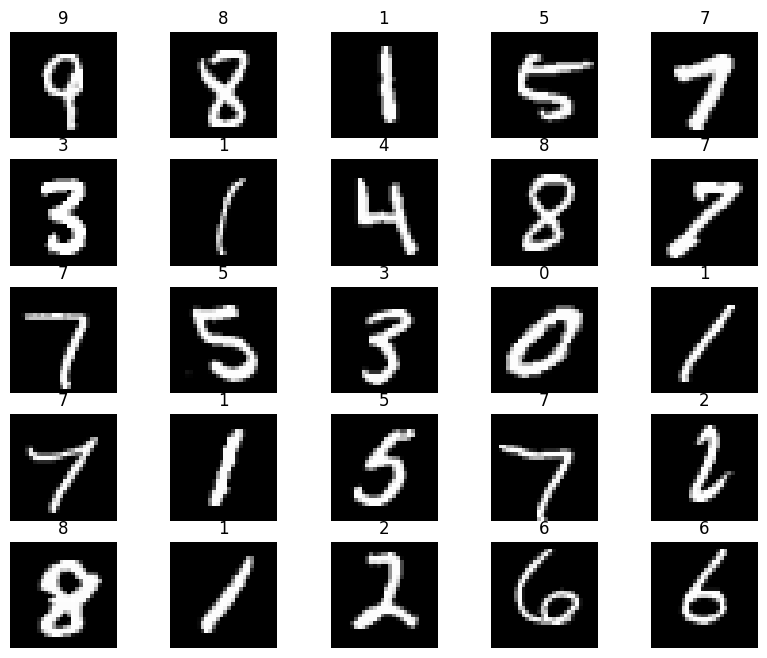

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
loaders = {
    'train' : torch.utils.data.DataLoader(
        train_data,
        batch_size=100,
        shuffle=True,
        num_workers=1,
    ),
    'test' : torch.utils.data.DataLoader(
        test_data,
        batch_size=100,
        shuffle=True,
        num_workers=1,
    )
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7ed4a025d480>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7ed4a025d630>}

In [ ]:
def CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = torch.nn.Sequential(
        torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.layer2 = torch.nn.Sequential(
        torch.nn.conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        torch.n.ReLu(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

    torch.nn.init.xavier_uniform_(self.fc.weight)

    def foward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = self.view(x.size(), -1)
      x = self.fc(x)

      return x

In [ ]:
model = CNN().to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)

In [ ]:
for epoch in range(traning_epohcs):
